In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

# SCRAPE OBSERVATION DATA

In [3]:
import csv
import time

from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import pickle
import requests


def scrape_data_one_day(station_id, year, month, day):
    """
    Retrieve PWS data for given station and a given day
    :param station_id: string
        PWS station ID
    :param year: int
        year
    :param month: int
        month
    :param day: int
        day
    :return: pandas DataFrame with data for requested day

    Sample URL:
    https://www.wunderground.com/weatherstation/WXDailyHistory.asp?
    ID=KWAEDMON15&day=18&month=4&year=2017&graphspan=day&format=1

    """

    url = "https://www.wunderground.com/" \
          "weatherstation/WXDailyHistory.asp?ID=" \
          + station_id + "&day=" \
          + str(day) + "&month=" \
          + str(month) + "&year=" \
          + str(year) \
          + "&graphspan=day&format=1"

    content = requests.get(url).text
    content = content.replace("\n", "")
    content = content.replace("<br>", "\n")
    content = content.replace(",\n", "\n")

    data_csv_lines = csv.reader(content.split('\n'), delimiter=',')
    data_list = list(data_csv_lines)
    data_df = pd.DataFrame.from_records(data_list[1:-1], columns=data_list[0])

    return data_df


def scrape_data_multi_day(station_id, start_date, end_date,
                          delay=3, combined_df=None):
    """
    Retrieve PWS data for given station and a given date range
    :param station_id: string
        PWS station ID
    :param startdate: int (yyyymmdd)
        start date for data retrieval
    :param enddate: int (yyyymmdd)
        end date for data retrieval
    :param delay: int
        delay between requests to WU server (seconds)
    :return: pandas DataFrame with combined data for period requested
    """

    if combined_df is None:
        combined_df = pd.DataFrame()
    else:
        pass

    # parse out date components
    start_date_str = str(start_date)
    start_date_yyyy = int(start_date_str[0:4])
    start_date_mm = int(start_date_str[4:6])
    start_date_dd = int(start_date_str[6:8])
    end_date_str = str(end_date)
    end_date_yyyy = int(end_date_str[0:4])
    end_date_mm = int(end_date_str[4:6])
    end_date_dd = int(end_date_str[6:8])

    # create date range
    start_date_pd = pd.datetime(start_date_yyyy, start_date_mm, start_date_dd)
    end_date_pd = pd.datetime(end_date_yyyy, end_date_mm, end_date_dd)
    date_list = pd.date_range(start_date_pd, end_date_pd)

    for date in date_list:
        temp_yyyy = date.year
        temp_mm = date.month
        temp_dd = date.day
        print('retrieving data for ' + station_id + " on " +
              str(temp_yyyy) + "-" + str(temp_mm) + "-" + str(temp_dd))
        day_df = scrape_data_one_day(station_id=station_id, year=temp_yyyy,
                                     month=temp_mm, day=temp_dd)
        combined_df = combined_df.append(day_df, ignore_index=True)
        time.sleep(delay)

    return combined_df

In [4]:
combined_df = scrape_data_multi_day("KWAEDMON15",20160201,20160202)

retreiving data for KWAEDMON15 on 2016-1-1
retreiving data for KWAEDMON15 on 2016-1-2
retreiving data for KWAEDMON15 on 2016-1-3
retreiving data for KWAEDMON15 on 2016-1-4
retreiving data for KWAEDMON15 on 2016-1-5
retreiving data for KWAEDMON15 on 2016-1-6
retreiving data for KWAEDMON15 on 2016-1-7
retreiving data for KWAEDMON15 on 2016-1-8
retreiving data for KWAEDMON15 on 2016-1-9
retreiving data for KWAEDMON15 on 2016-1-10
retreiving data for KWAEDMON15 on 2016-1-11
retreiving data for KWAEDMON15 on 2016-1-12
retreiving data for KWAEDMON15 on 2016-1-13
retreiving data for KWAEDMON15 on 2016-1-14
retreiving data for KWAEDMON15 on 2016-1-15
retreiving data for KWAEDMON15 on 2016-1-16
retreiving data for KWAEDMON15 on 2016-1-17
retreiving data for KWAEDMON15 on 2016-1-18
retreiving data for KWAEDMON15 on 2016-1-19
retreiving data for KWAEDMON15 on 2016-1-20
retreiving data for KWAEDMON15 on 2016-1-21
retreiving data for KWAEDMON15 on 2016-1-22
retreiving data for KWAEDMON15 on 2016-1-

In [5]:
combined_df.shape

(6318, 15)

In [8]:
combined_df

,Time,TemperatureF,DewpointF,PressureIn,WindDirection,WindDirectionDegrees,WindSpeedMPH,WindSpeedGustMPH,Humidity,HourlyPrecipIn,Conditions,Clouds,dailyrainin,SoftwareType,DateUTC
0,2016-01-03 13:40:00,35.7,31.6,29.96,SW,217,1.0,1.0,85,0.00,,,0.00,Wunderground v.1.15,2016-01-03 21:40:00
1,2016-01-03 13:42:00,35.6,31.8,29.96,ESE,108,1.0,1.0,86,0.00,,,0.00,Wunderground v.1.15,2016-01-03 21:42:00
2,2016-01-03 13:48:00,35.3,31.8,29.96,East,89,1.0,4.0,87,0.00,,,0.00,Wunderground v.1.15,2016-01-03 21:48:00
3,2016-01-03 13:53:00,35.0,31.8,29.96,ENE,75,1.0,4.0,88,0.00,,,0.00,Wunderground v.1.15,2016-01-03 21:53:00
4,2016-01-03 13:59:00,34.7,31.8,29.95,ENE,59,2.0,2.0,89,0.00,,,0.00,Wunderground v.1.15,2016-01-03 21:59:00
5,2016-01-03 14:05:00,34.3,31.7,29.95,East,87,2.0,3.0,90,0.00,,,0.01,Wunderground v.1.15,2016-01-03 22:05:00
6,2016-01-03 14:06:00,34.3,31.9,29.96,East,79,1.0,3.0,91,0.00,,,0.01,Wunderground v.1.15,2016-01-03 22:06:00
7,2016-01-03 14:11:00,34.1,31.7,29.95,East,84,1.0,1.0,91,0.00,,,0.01,Wunderground v.1.15,2016-01-03 22:11:00
8,2016-01-03 14:17:00,34.0,31.9,29.95,ENE,77,1.0,2.0,92,0.00,,,0.01,Wunderground v.1.15,2016-01-03 22:17:00
9,2016-01-03 14:22:00,34.0,32.2,29.95,North,7,0.0,1.0,93,0.00,,,0.01,Wunderground v.1.15,2016-01-03 22:22:00


In [6]:
pickle.dump(combined_df, open("KWAEDMON15.p", "wb"))

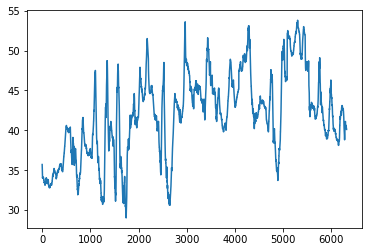

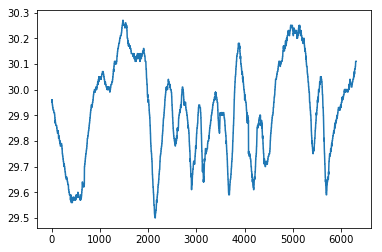

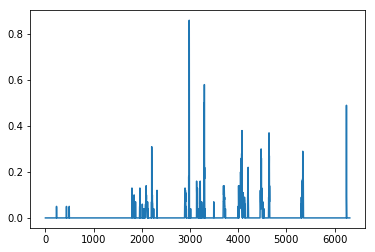

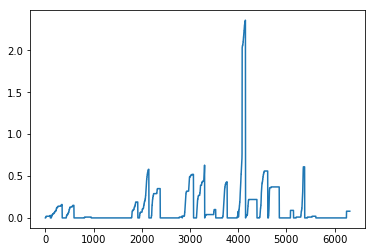

In [7]:
plt.plot(combined_df['TemperatureF']); plt.show();
plt.plot(combined_df['PressureIn']); plt.show();
plt.plot(combined_df['HourlyPrecipIn']); plt.show();
plt.plot(combined_df['dailyrainin']); plt.show();

In [16]:
station_info = scrape_station_info("WA")

In [24]:
station_info[1:,0]

array(['KWAVENER2', 'KWAMARYS7', 'KWAWALLA2', ..., 'MC9363', 'MCMOW1',
       'MTZILL'], 
      dtype='<U66')

# SCRAPE STATION INFO

In [ ]:
def scrape_station_info(state="WA"):

    """
    A script to scrape the station information published at the following URL:
    https://www.wunderground.com/weatherstation/ListStations.asp?
    selectedState=WA&selectedCountry=United+States&MR=1
    :param state: US State by which to subset WU Station table
    :return: numpy array with station info
    """
    url = "https://www.wunderground.com/" \
          "weatherstation/ListStations.asp?selectedState=" \
          + state + "&selectedCountry=United+States&MR=1"
    raw_site_content = requests.get(url).content
    soup = BeautifulSoup(raw_site_content, 'html.parser')

    list_stations_info = soup.find_all("tr")

    all_station_info = np.array(['id', 'neighborhood', 'city', 'type'])

    for i in range(1, len(list_stations_info)):  # start at 1 to omit headers

        station_info = str(list_stations_info[i]).splitlines()

        # pull out station info
        station_id = station_info[1].split('ID=')[1].split('"')[0]
        station_neighborhood = station_info[2].split('<td>')[1]
        station_neighborhood = station_neighborhood.split('\xa0')[0]
        station_city = station_info[3].split('<td>')[1].split('\xa0')[0]
        station_type = station_info[4].split('station-type">')[1]
        station_type = station_type.split('\xa0')[0]

        station_id = station_id.strip()
        station_neighborhood = station_neighborhood.strip()
        station_city = station_city.strip()
        station_type = station_type.strip()

        all_station_info = np.vstack([all_station_info,
                                      [station_id, station_neighborhood,
                                       station_city, station_type]])

    return all_station_info

In [ ]:
all_info = scrape_station_info()

In [ ]:
all_info[all_info[:,0]=="KWAEDMON15"]

### requests

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://www.wunderground.com/weatherstation/ListStations.asp?selectedState=WA&selectedCountry=United+States&MR=1"

raw_site_content = requests.get(url).content
soup = BeautifulSoup(raw_site_content, 'html.parser')

In [ ]:
list_stations_info = soup.find_all("tr")  # one text element in list for each station

all_stations = np.array(['id','neighborhood','city','type'])

for i in range(1, len(list_stations_info)):  # start at 1 to omit first element (col headers)
    
    station_info = str(list_stations_info[i]).splitlines()
    
    # pull out station info
    station_id = station_info[1].split('ID=')[1].split('"')[0].strip()
    station_neighborhood = station_info[2].split('<td>')[1].split('\xa0')[0].strip()
    station_city = station_info[3].split('<td>')[1].split('\xa0')[0].strip()
    station_type = station_info[4].split('station-type">')[1].split('\xa0')[0].strip()

    all_stations = np.vstack([all_stations,[station_id,station_neighborhood,station_city,station_type]])


### urllib3

In [ ]:
import urllib3
http = urllib3.PoolManager()
raw_site_urllib3 = http.request('GET', url)

raw_site_content = raw_site_urllib3.data;

In [ ]:
#for link in soup.find_all('a'):
#    print(link.get('href'))

# SCRAPE OBSERVATION DATA

In [ ]:
start_date = 20160909
end_date = 20160912

In [ ]:
import pandas as pd

start_date = str(start_date)
start_date_yyyy = int(start_date[0:4])
start_date_mm = int(start_date[4:6])
start_date_dd = int(start_date[6:8])

end_date = str(end_date)
end_date_yyyy = int(end_date[0:4])
end_date_mm = int(end_date[4:6])
end_date_dd = int(end_date[6:8])

start_date = pd.datetime(start_date_yyyy, start_date_mm, start_date_dd)
end_date = pd.datetime(end_date_yyyy, end_date_mm, end_date_dd)

date_range = pd.date_range(start_date, end_date)

In [ ]:
day = date_range[0]

In [ ]:
day.year

In [ ]:
import requests
import csv
import os

temp_file_name = 'temp_csv.csv'
url = 'https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID=KWAEDMON15&day=10&month=9&year=2016&graphspan=day&format=1'
download = requests.get(url)

# with open(temp_file_name, 'w') as temp_file:
#     temp_file.writelines(download.text)

In [ ]:
temp = download.text
type(temp)
temp = temp.replace("\n","")
temp = temp.splitlines()
temp

In [ ]:
import urllib3
from bs4 import BeautifulSoup as Soup

http = urllib3.PoolManager()
r = http.request('GET', url)
r.data

In [ ]:
temp.replace("<br>","")

In [ ]:
# temp = download.text.split('<br>')
# temp = [ line.strip() for line in temp ]
# temp

In [ ]:
def scrape_data(station_id="KWAEDMON15", year=2017, month=4, day=18):

    test_url = "https: // www.wunderground.com / weatherstation / WXDailyHistory.asp?" \
               "ID = KWAEDMON15 & day = 18 & month = 4 & year = 2017 & graphspan = day & format = 1"

    filename = station_id + "_" + str(year) + str(month) + str(day)

    print(filename)

In [ ]:
scrape_data()

In [ ]:
import requests

In [ ]:
station_id="KWAEDMON15"
year=2017
month=4
day=18

print("https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={}&day={}&month={}&year={}&graphspan=day&format=1".format(station_id, day, month, year))

In [ ]:
station_id="KWAEDMON15"
year=2017
month=4
day=18

url = "https://www.wunderground.com/weatherstation/WXDailyHistory.asp?ID={}&day={}&month={}&year={}&graphspan=day&format=1".format(station_id, day, month, year)
print(url)